In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [98]:
tipo_capital = "i"
cantidad_tiradas = 50
cantidad_corridas = 10
apuesta_inicial = 5
capital_inicial = 1000 if tipo_capital == "f" else 0

In [99]:
rojo = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]

In [100]:
def fibonacci(listado_apuestas, is_win):
    """
    Implementa un sistema de apuestas basado en la estrategia de progresión Fibonacci.
    Si la apuesta es ganadora, se retrocede dos posiciones en el listado.
    Si la apuesta es perdedora, se suma el valor de las ultmas dos apuestas.

    Parameters:
    listado_apuestas (list): Lista que contiene los montos de las apuestas previas.
    is_win (bool): Indica si la última apuesta fue ganadora (True) o perdedora (False).

    Returns:
    int: El monto de la próxima apuesta según la estrategia Fibonacci.
    """
    global capital, apuesta_inicial
    ultima_apuesta = listado_apuestas[-1]
    if is_win:
        capital += ultima_apuesta
        proxima_apuesta = max(listado_apuestas[-3] if len(listado_apuestas) > 2 else ultima_apuesta, apuesta_inicial)
    else:
        capital -= ultima_apuesta
        proxima_apuesta = max(sum(listado_apuestas[-2:]) if len(listado_apuestas) > 1 else ultima_apuesta, apuesta_inicial)

    return proxima_apuesta

    

In [101]:
tiradas = np.random.randint(0,37,size=[cantidad_tiradas])

In [102]:
listado_apuestas_total = []
listado_capital_total = []
listado_wins_total = []
listado_frecuencia_total = []
listado_dfs = []

for corrida in range(cantidad_corridas):

    capital = capital_inicial
    tiradas = np.random.randint(0,37,size=[cantidad_tiradas])

    listado_apuestas = []
    listado_capital = []
    listado_wins = []
    listado_frecuencia_relativa = []

    listado_apuestas.append(apuesta_inicial)
    listado_capital.append(capital)

    for index, tirada in enumerate(tiradas):
        
        is_win = tirada in rojo
        listado_wins.append(is_win)

        listado_frecuencia_relativa.append(listado_wins.count(True)/(index+1))

        proxima_apuesta = fibonacci(listado_apuestas, is_win)
        print(proxima_apuesta)
        print(f"capital {capital}")
        
        if proxima_apuesta > capital and tipo_capital == 'f': # banca rota
            break

        if len(listado_apuestas) == cantidad_tiradas:
            break
        
        listado_apuestas.append(proxima_apuesta)
        listado_capital.append(capital)
        
    listado_apuestas_total.append(listado_apuestas)
    listado_capital_total.append(listado_capital)
    listado_wins_total.append(listado_wins)
    listado_frecuencia_total.append(listado_frecuencia_relativa)
    
    df = pd.DataFrame({
            'capital': listado_capital,
            'apuesta': listado_apuestas,
            'win': listado_wins,
            'fr': listado_frecuencia_relativa
        })
    
    # df.index = pd.RangeIndex(start=1, stop=len(df)+1)
    
    listado_dfs.append(df)
    


5
capital -5
5
capital 0
5
capital 5
5
capital 10
10
capital 5
5
capital 15
15
capital 10
20
capital -5
5
capital 15
25
capital 10
20
capital 35
45
capital 15
65
capital -30
110
capital -95
175
capital -205
65
capital -30
110
capital 35
175
capital 145
285
capital -30
110
capital 255
175
capital 365
285
capital 190
110
capital 475
395
capital 365
285
capital 760
680
capital 475
965
capital -205
1645
capital -1170
680
capital 475
2325
capital -205
1645
capital 2120
680
capital 3765
2325
capital 4445
1645
capital 6770
3970
capital 5125
2325
capital 9095
6295
capital 6770
3970
capital 13065
10265
capital 9095
6295
capital 19360
3970
capital 25655
10265
capital 29625
14235
capital 19360
24500
capital 5125
10265
capital 29625
14235
capital 39890
24500
capital 25655
10265
capital 50155
34765
capital 39890
45030
capital 5125
5
capital -5
5
capital 0
10
capital -5
15
capital -15
25
capital -30
40
capital -55
15
capital -15
25
capital 0
40
capital 25
15
capital 65
55
capital 50
70
capital -5
12

In [103]:
listado_dfs[-1]

,capital,apuesta,win,fr
0,0,5,False,0.000000
1,-5,5,False,0.000000
2,-10,10,False,0.000000
3,-20,15,True,0.250000
4,-5,5,True,0.400000
5,0,10,True,0.500000
6,10,15,False,0.428571
7,-5,25,False,0.375000
8,-30,40,False,0.333333
9,-70,65,False,0.300000


In [104]:
def graficar_histograma(listado_dfs):
    fig, ax = plt.subplots()

    ax.set_title(f"HISTOGRAMA {cantidad_corridas} CORRIDAS")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('fr (frecuencia relativa)')

    for df in listado_dfs:
        ax.bar(df.index, df['fr'], alpha=0.5)

    plt.show()

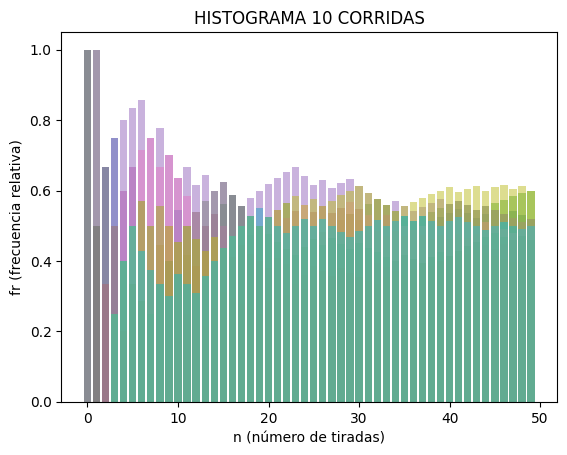

In [105]:
graficar_histograma(listado_dfs)

In [106]:
def grafico_flujo_caja(listado_capital_total):
    global capital_inicial, tipo_capital
    
    fig, ax = plt.subplots()

    ax.set_title(f"ESTRATEGIA FIBONACCI CAPITAL {tipo_capital}")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('cc (cantidad de capital)')

    for listado_capital in listado_capital_total:
        ax.plot(listado_capital, linewidth=2.0, )

    ax.axhline(capital_inicial, color='r', linestyle='--', label='fci (flujo de caja inicial)')

    ax.ticklabel_format(axis='y', style='plain')

    plt.legend()
    plt.show()

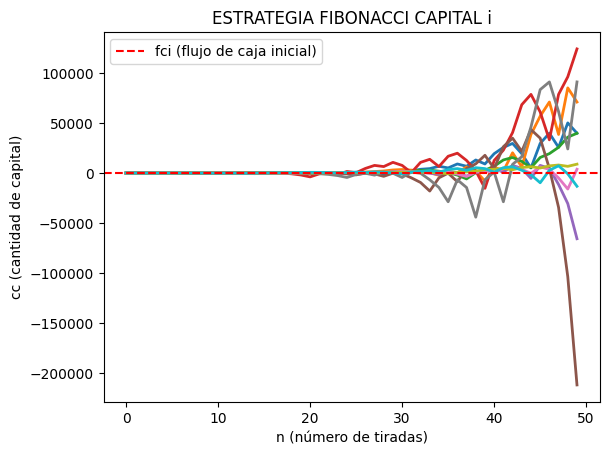

In [107]:
grafico_flujo_caja(listado_capital_total)